In [2]:
import dpp_nets.my_torch as my_torch
import torch
import numpy as np
from dpp_nets.my_torch.controlvar import compute_alpha
import matplotlib.pyplot as plt
from dpp_nets.dpp.score_dpp import score_dpp
from dpp_nets.dpp.sample_dpp import sample_dpp
import dpp_nets.helper.plotting as plot
from dpp_nets.my_torch.baseline import RegressorBaseline

def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)

def overwrite_weights(from_model, to_model):
    from_dict = from_model.state_dict()
    to_dict = to_model.state_dict()
    
    for k in to_dict.keys():
        to_dict[k] = from_dict[k]
    
    to_model.load_state_dict(to_dict)
    return to_model

network_params = {'emb_in': 80, 'emb_h': 200, 'emb_out': 100,
                  'pred_in': 40, 'pred_h': 100, 'pred_out': 1,
                  'set_size': 40} 

dtype = torch.DoubleTensor

train_iter_base = 200
batch_size = 10
train_iter = batch_size * train_iter_base
sample_iter = 1
alpha_iter = 0
lr = 1e-5
weight_decay = 0
reg_exp = 1
reg_var = 0
rajeesh=True
el_mean=False
overwrite=0
alll=True

In [3]:
set_seed(33)
DPP = my_torch.DPPRegressor(network_params, dtype)
baseline = RegressorBaseline(network_params, dtype)
baseline = overwrite_weights(DPP, baseline)

Number of different clusters was:  12
Number of clusters predicted was:  8.139893429461594
Resultant loss was:  14.900422735913773
Retrieved subset was of size:  27
Number of clusters detected by DPP was:  12
Number of different clusters was:  4
Number of clusters predicted was:  -57.9838651032706
Resultant loss was:  3841.999533140447


In [6]:
DPP.evaluate(1000)

Average Loss is:  19.002315703769035
Average Subset Size:  22.798000000000027
Subset Variance:  0.47173181692386856
Proportion of true clusters retrieved: 0.9974013921113689


In [9]:
# try to train the DPP network

train_iter_base = 20000
batch_size = 10
train_iter = batch_size * train_iter_base
sample_iter = 1
alpha_iter = 5
lr = 1e-6
weight_decay = 0
reg_exp = 1
reg_var = 0
rajeesh=False
el_mean=False
overwrite=0
alll=True


DPP.train_with_baseline(train_iter, batch_size, sample_iter, alpha_iter, lr, weight_decay, reg_exp, reg_var, 
        rajeesh, el_mean, overwrite, all)

50 0.09412065523703074
100 2.5626998954959896
150 2.7160518546236627
200 54.463240850047534
250 0.01809115496638817
300 70.1963055823157
350 5.720013873770003
400 6.156242195315758
450 55.015806136672765
500 42.11904837124235
550 44.9556620158155
600 2.422545697223067
650 7.863505507890031
700 5.6851737215250875
750 71.11562676285044
800 50.64565158039707
850 17.093814313342175
900 21.377736806346007
950 4.907539101514783
1000 1.3356887087297968
1050 0.3424987765272593
1100 0.060523725353118236
1150 0.20624134190014606
1200 29.575349560576164
1250 1.1140212249566601
1300 27.1605552895459
1350 0.5059076797942155
1400 0.7400379031836756
1450 0.18721106903148474
1500 0.02618071823579683
1550 85.3494628304978
1600 34.08590036203968
1650 7.939767610866425
1700 39.37265109442197
1750 0.13257085570241295
1800 4.561028102844624
1850 3.102822454715973
1900 1.743574032816038
1950 0.12477690968996161
2000 29.4608831190101
2050 11.72977805486001
2100 5.922402754126624
2150 35.95082676023967
2200 5

17100 2.3819361715398992
17150 0.7902998149010056
17200 233.92493664395974
17250 0.8115100369956421
17300 57.08235354793348
17350 0.09094235208443993
17400 17.427917109303362
17450 3.571580074395302
17500 0.260193063947389
17550 12.640315780917893
17600 2.5674216013490763
17650 28.74742737880033
17700 16.68763996023672
17750 11.387116694703687
17800 1.6524990251923866
17850 9.58596333117584
17900 0.48307355397527346
17950 19.686715271693416
18000 44.0709082249789
18050 2.6459543416851297
18100 0.008293379369362266
18150 0.02568414036856512
18200 3.52291184594245
18250 1.6954410842823429
18300 5.09968562816692
18350 38.523648790055375
18400 1.3166090195176166
18450 15.984266983065606
18500 13.98340520843011
18550 13.692480825941107
18600 5.327852195336019
18650 26.941745815537736
18700 5.751729637931315
18750 11.308291687315723
18800 2.4238069103830906
18850 6.12604535999544
18900 0.3901531979565154
18950 14.77326706010999
19000 6.87410085854394
19050 15.814916986320942
19100 3.96255669

33650 14.986795804554273
33700 7.335314169497144
33750 18.03655355036675
33800 8.398474317121982
33850 12.482379453915927
33900 1.15606597584273
33950 0.036682069934297325
34000 29.697686654602794
34050 6.023192005876866
34100 16.219517030453655
34150 0.9748551655144231
34200 2.917159942231787
34250 8.699693737494645
34300 6.973446077661779
34350 22.771880875035748
34400 28.132431833716765
34450 9.15817234972772
34500 5.159108539382783
34550 12.15420148875538
34600 1.758684763257975
34650 1.683522985796377
34700 33.8593823364241
34750 1.8925493316619488
34800 2.7095838756132196
34850 31.685302500381137
34900 0.3721021778436109
34950 6.222954326095039
35000 12.46689438816258
35050 2.431178349700118
35100 16.62271129559228
35150 8.112163579523306
35200 17.187590542162145
35250 1.121202272974835
35300 248.08031259228224
35350 64.27090985764033
35400 0.8635914394668771
35450 0.15918970675539004
35500 3.4261599590655063
35550 40.47150143462191
35600 13.836123793725632
35650 69.5067953611470

50250 29.41678252899604
50300 0.5584934801056278
50350 1.2843834228382307
50400 0.613197245875922
50450 0.3277699126248621
50500 2.655008024357711
50550 18.819164572080275
50600 5.154583459090028
50650 3.7820544479335503
50700 15.219547561156434
50750 15.35078005193007
50800 39.208158924195374
50850 4.095068656421415
50900 0.4187061444432807
50950 15.245279315301241
51000 0.14193013418251182
51050 11.080814698816114
51100 14.283839117840705
51150 0.7916098195506379
51200 30.26578178136525
51250 19.711308281666806
51300 1.3325757674977494
51350 4.560648275731585
51400 2.977055245871279
51450 0.24791199869520653
51500 0.003650340018990839
51550 6.003044304698208
51600 11.115262562011273
51650 13.936781617915006
51700 0.768585794176082
51750 13.565542184940384
51800 0.15538153337106
51850 6.72634158842354
51900 7.152383350333491
51950 0.4576584595548725
52000 4.2998300117441675
52050 4.6467397669132025
52100 0.40161269677346817
52150 1.9386631979499316
52200 15.191245308841037
52250 1.345

66850 2.299223333306521
66900 13.897504343863137
66950 32.185258140372454
67000 3.0486219183754644
67050 4.89192530682536
67100 3.3949379781067246
67150 17.55453900376397
67200 8.003561812546302
67250 7.0941886298285635
67300 5.563745804858648
67350 7.746901560784484
67400 7.671668787427266
67450 68.61449687610217
67500 16.046766793994696
67550 2.9103281069839584
67600 0.4303173069763264
67650 0.030882666017456366
67700 0.3620834516755644
67750 5.125655253900552
67800 6.390664803304316
67850 1.4309636769973555
67900 4.414201255867642
67950 14.823800260872835
68000 44.61131986275992
68050 27.176958681903656
68100 22.918948506057355
68150 21.11547383577087
68200 0.41055488030555426
68250 0.02397684537658621
68300 0.991099222407064
68350 3.284323685719375
68400 16.368073479969198
68450 0.35727276191324453
68500 42.51565084834266
68550 47.726387143979125
68600 3.3364990688302565
68650 16.589146087904158
68700 5.014176581320129
68750 2.077203128147471
68800 2.9568975158837034
68850 0.003319

83450 4.4603068540352035
83500 5.701858323173047
83550 2.299459555426543
83600 0.8508970913265983
83650 13.198906427876956
83700 12.723334297996628
83750 5.487117646215061
83800 0.06495530020443673
83850 4.297257221485762
83900 1.8716856611787827
83950 5.073634917904899
84000 43.269430508417834
84050 0.03313887162604659
84100 2.7655385268280255
84150 21.686978044233108
84200 3.413334294355083
84250 1.0751655977034034
84300 0.6439289873693326
84350 3.8244865252883304
84400 4.478730259686179
84450 10.58977869593012
84500 4.63543945049113
84550 12.322137985751183
84600 5.273146120516088
84650 4.125546674307285
84700 57.99218616444916
84750 8.720245660115395
84800 1.528259232620623
84850 3.4470598047333083
84900 3.6043703254014448
84950 0.21263994621442792
85000 1.7288525672917638
85050 1.967501842185816
85100 6.260794853224098
85150 3.3452513099927876
85200 7.257883138408453
85250 2.9693301835103036
85300 0.001622202640404486
85350 2.2325040782822936
85400 16.99782695564314
85450 7.883926

100000 3.9029046101792737
100050 0.9967856720026558
100100 0.5431766940363421
100150 8.63967808893734
100200 16.665269378062032
100250 1.318543782367256
100300 0.2018769858856657
100350 15.820137059303518
100400 1.2225966176514547
100450 16.244143505980443
100500 1.682054609495741
100550 2.406060146797967
100600 38.742045041318974
100650 19.85126721278979
100700 0.6192675851519375
100750 14.645753376739938
100800 6.905926138341213
100850 28.572707696263286
100900 8.599393455064103
100950 0.3722715839593698
101000 0.3276718150578062
101050 0.10800920986991687
101100 21.561320963864766
101150 0.6764324646711676
101200 0.42446360669739885
101250 0.5157450385860147
101300 29.985959181494174
101350 0.08330512980006252
101400 55.732847561032216
101450 6.692820617862845
101500 0.040658676679293376
101550 0.4240821617094177
101600 12.204245025502672
101650 1.20668273775416
101700 13.645095859014564
101750 7.623179382305666
101800 29.15979152108001
101850 0.01624160660439009
101900 0.4981485029

115950 6.242805508033362
116000 5.1356437107899096
116050 24.269272734702806
116100 0.0013530801876011167
116150 5.122696411102625
116200 16.025912311089577
116250 3.501482379201052
116300 3.5454644666347312
116350 6.08490801326478
116400 2.8928388681173463
116450 0.11385601608493777
116500 1.6559346095059881
116550 1.975200622994129
116600 4.7455819596949045
116650 8.888201817695174
116700 2.509909556931572
116750 5.165488744891734
116800 2.490358064572819
116850 0.2533944762256963
116900 0.8846181327498116
116950 0.7221429182529667
117000 44.073474860687796
117050 2.7270452143019654
117100 6.349340762733042
117150 4.162226319903936
117200 0.030555405262540237
117250 0.3620641164238515
117300 0.23725137441965852
117350 1.4408444175982253
117400 3.422545767077782
117450 9.755850718430807
117500 3.34366923274003
117550 6.860692497497234
117600 0.1604563073737278
117650 7.143599769493842
117700 0.9277777593281176
117750 0.048129848300745584
117800 3.688046679408062
117850 2.5828507416430

131850 0.8854348836472746
131900 2.4795675840134543
131950 0.33625879126732094
132000 5.064591850602654
132050 0.011711979171607148
132100 0.28456237551542446
132150 4.505796376996175
132200 2.1416419648498684
132250 2.8594835090302873
132300 2.358195255257854
132350 0.005170426026602537
132400 4.2580161595490225
132450 2.137248601597345
132500 0.8077075632490176
132550 15.321277262910664
132600 0.5502920858128915
132650 1.88413873070611
132700 8.798558658748819
132750 8.727560594749658
132800 0.7473164464278073
132850 2.4810615914112613
132900 0.4400453852413374
132950 4.74179317298285
133000 19.61038385521462
133050 4.039753027911262
133100 2.5630450443854884
133150 2.991749118030369
133200 0.19376214246156384
133250 0.11865728764312125
133300 1.5542360985112735
133350 2.687822919329237
133400 21.15819881250899
133450 0.07829272240826618
133500 3.3489159977076137
133550 25.42969398180433
133600 2.0860565978509107
133650 0.25515938734725535
133700 3.325630061044876
133750 7.4916273271

147750 0.04046354229268293
147800 28.060193351373513
147850 8.570257300741957
147900 0.044486653603400955
147950 6.062210907195805
148000 1.905041707121089
148050 0.2710692157083261
148100 2.57948522895303
148150 14.867216033018327
148200 1.5547521212012765
148250 1.6939216481568895
148300 3.5054984869643353
148350 0.2185108972702261
148400 3.4505402733497967
148450 0.004602717685473026
148500 0.7618384735174097
148550 2.114135123843459
148600 5.56305777252775
148650 2.1262774404715437
148700 1.1326598353185509
148750 0.20122097725961785
148800 0.006229793044613898
148850 9.10634055836527
148900 31.81419429566095
148950 10.81559488205289
149000 9.68986939839552
149050 22.815120765803112
149100 0.552595191071145
149150 0.2925266291189211
149200 5.924540271703765
149250 8.270119100991423
149300 0.5346520009381572
149350 15.222923400639603
149400 63.91075467134558
149450 8.005242728534506
149500 92.66231171627736
149550 13.55802685132871
149600 20.4611491254459
149650 0.46034805455115846


163650 5.333685156400215
163700 5.458473313786799
163750 2.7338315152142623
163800 1.3453486770535537
163850 0.5705096446169315
163900 30.70594775090303
163950 3.45612972313528
164000 0.49819374342354256
164050 9.143862198337857
164100 29.251372389413593
164150 0.21258609984675103
164200 5.713474259876715
164250 3.9934231584950073
164300 8.152137971376805
164350 4.452807091455754
164400 0.18054656136932246
164450 3.926522238531893
164500 0.14295291112558783
164550 0.025319040900019504
164600 9.95165703204993
164650 21.051028129205427
164700 4.534144296965887
164750 8.638249195333456
164800 13.292531254739597
164850 17.39808440113976
164900 9.616880649629971
164950 3.8068522196954087
165000 1.1670476032868937
165050 3.21798368726972
165100 10.635354072037257
165150 5.662177096250966
165200 36.52236996208862
165250 2.357350696054844
165300 11.479637147834906
165350 0.8985026568622009
165400 0.386883895310306
165450 17.932400385652517
165500 0.1598115903392468
165550 0.22944384282648483
1

179550 0.10189575731824989
179600 0.0911233906521697
179650 0.7980751446895149
179700 25.474939634310434
179750 11.937530146807058
179800 2.013688570144379
179850 0.027480483745537465
179900 10.98830203591199
179950 1.763841178869635
180000 8.062807669433123
180050 13.126979993933524
180100 1.511613205474117
180150 0.8206589235012574
180200 4.644714552472628
180250 0.005699011382966677
180300 1.6864287418552262
180350 0.8764505826384942
180400 4.957029108538923
180450 0.019680437490931416
180500 0.020727147691234682
180550 0.30007463553412594
180600 1.6605672162108869
180650 8.145955788228832
180700 12.062777960935708
180750 3.5885923215510727
180800 1.3618603057435827
180850 0.26362823957631637
180900 0.043149422615031324
180950 11.761625105604205
181000 2.4099513279176668
181050 0.1409650398425207
181100 3.906980363258799
181150 0.00214312113371183
181200 0.05858642193120978
181250 33.25247706984583
181300 9.070049414416738
181350 0.6165258489292743
181400 0.12775203070833552
181450 

195450 0.45320515403681416
195500 1.1120552120355345
195550 5.949938329339137
195600 4.168379778891436
195650 0.08300026334283453
195700 14.916068945313372
195750 33.56059341149615
195800 0.2609407665854176
195850 47.40640163129715
195900 0.028608845917391115
195950 1.8643126496279392
196000 0.1795671642501579
196050 0.089657188313012
196100 0.8504148194864096
196150 4.880161670570532
196200 1.719925833428881
196250 0.0027213653316207555
196300 6.189212681153474
196350 1.143794121069523
196400 1.9279659535643043
196450 1.884025969959292
196500 0.5733798276422832
196550 0.8302457137689331
196600 0.06118105587912533
196650 12.025570279533714
196700 2.31817269879516
196750 0.6813002806577598
196800 26.557657397711214
196850 4.833470593653449
196900 0.8608004345618181
196950 1.2295231491227758
197000 22.87110737699556
197050 3.6841035121400343
197100 4.250663015898181
197150 0.3614248305348691
197200 0.404846708165473
197250 4.663984426708413
197300 0.15100389633534356
197350 13.0930218864

In [ ]:
DPP.loss_dict

In [ ]:
DPP.a_loss_dict

In [ ]:
10 - DPP.alpha_dict[0][0]

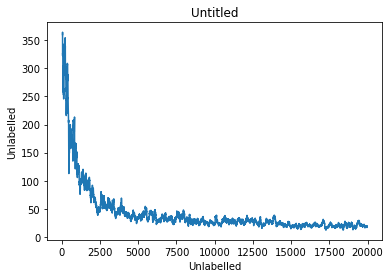

In [8]:
# Plot a loss function
plot.plot_defaultdict(DPP.loss_dict,100)

In [ ]:
# Doing the plotting
(pred, target), (words, context), clusters = DPP.sample()
plot.plot_matrix(plot.gen_matrix_from_cluster_ix(clusters))
plot.plot_embd(DPP.embedding.data)

In [ ]:
# Save a state-dict
torch.save(DPP.state_dict(), "dpp_nets/models/loss_baseline.p")

In [ ]:
# Load pre-trained predcitor
import copy

trained_pred = torch.load("dpp_nets/models/trained_pred.p")
state_clone = copy.deepcopy(trained_pred)
model = my_torch.DPPRegressor(network_params, dtype)
model.load_state_dict(trained_pred)

DPP.load_state_dict(state_clone)
set_seed(10)
DPP.evaluate(1000)

In [7]:
DPP.loss_dict

defaultdict(list, {0: [
               151.1384
              [torch.DoubleTensor of size 1]], 1: [
               1527.6407
              [torch.DoubleTensor of size 1]], 2: [
               2083.6183
              [torch.DoubleTensor of size 1]], 3: [
               666.9531
              [torch.DoubleTensor of size 1]], 4: [
               139.7192
              [torch.DoubleTensor of size 1]], 5: [
               7.8097
              [torch.DoubleTensor of size 1]], 6: [
               40.2546
              [torch.DoubleTensor of size 1]], 7: [
               44.2471
              [torch.DoubleTensor of size 1]], 8: [
              1.00000e-03 *
                7.2113
              [torch.DoubleTensor of size 1]], 9: [
               292.5889
              [torch.DoubleTensor of size 1]], 10: [
               233.3165
              [torch.DoubleTensor of size 1]], 11: [
               3.0412
              [torch.DoubleTensor of size 1]], 12: [
               303.5652
              